In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
uploaded = files.upload()

Saving covid-hospit-2023-03-31-18h01.csv to covid-hospit-2023-03-31-18h01.csv


In [6]:
import pandas as pd
file_path = '/content/covid-hospit-2023-03-31-18h01.csv'
df = pd.read_csv(file_path,sep=";")
display(df.head())

,dep,sexe,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,01,0,2020-03-18,2,0,NaN,NaN,NaN,1,0
1,01,1,2020-03-18,1,0,NaN,NaN,NaN,1,0
2,01,2,2020-03-18,1,0,NaN,NaN,NaN,0,0
3,02,0,2020-03-18,41,10,NaN,NaN,NaN,18,11
4,02,1,2020-03-18,19,4,NaN,NaN,NaN,11,6


In [7]:
display(df.head().dtypes)

,0
dep,object
sexe,int64
jour,object
hosp,int64
rea,int64
HospConv,float64
SSR_USLD,float64
autres,float64
rad,int64
dc,int64


In [10]:
df["jour"] = pd.to_datetime(df["jour"])
df.dtypes

,0
dep,object
sexe,int64
jour,datetime64[ns]
hosp,int64
rea,int64
HospConv,float64
SSR_USLD,float64
autres,float64
rad,int64
dc,int64


In [11]:
agg_par_jour = df.drop(["dep","sexe"], axis = 1).groupby("jour").sum()
agg_par_jour

,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
jour,,,,,,,
2020-03-18,5905,1535,0.0,0.0,0.0,1627,435
2020-03-19,7961,1975,0.0,0.0,0.0,2322,642
2020-03-20,10272,2564,0.0,0.0,0.0,3128,890
2020-03-21,11599,2872,0.0,0.0,0.0,3580,1041
2020-03-22,13675,3311,0.0,0.0,0.0,4188,1251
...,...,...,...,...,...,...,...
2023-03-27,25986,1448,14526.0,9267.0,745.0,1715906,270815
2023-03-28,26121,1433,14650.0,9293.0,745.0,1716872,270892
2023-03-29,26137,1460,14649.0,9281.0,747.0,1717875,270959


<Axes: title={'center': 'Evolution des hospitalisations par jour'}, xlabel='jour'>

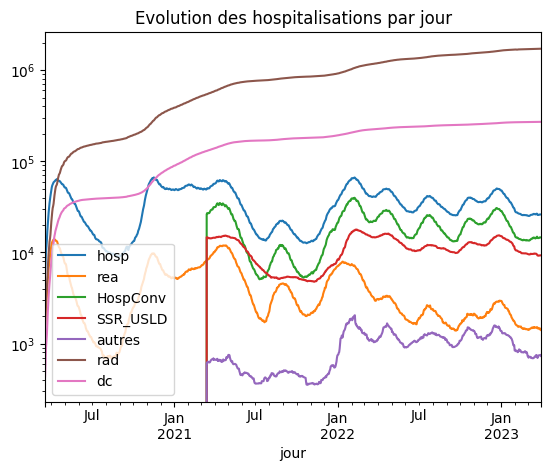

In [13]:
agg_par_jour.plot(title="Evolution des hospitalisations par jour",logy=True)

<Axes: title={'center': 'graph'}, xlabel='sexe'>

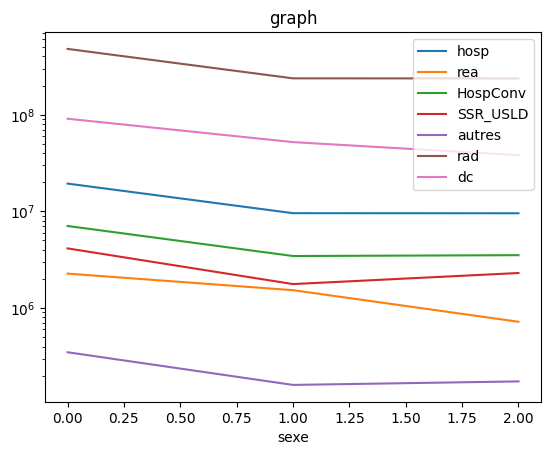

In [35]:
agg_par_jour_sexe = df.drop(['dep','jour'], axis=1).groupby(['sexe']).sum()
agg_par_jour_sexe.plot(title="graph",logy=True)

In [55]:
agg_par_jour['hosp'].diff()
#display(agg_par_jour['rea'].diff())
#display(agg_par_jour['hosp'].diff())

,hosp
jour,
2020-03-18,NaN
2020-03-19,2056.0
2020-03-20,2311.0
2020-03-21,1327.0
2020-03-22,2076.0
...,...
2023-03-27,158.0
2023-03-28,135.0
2023-03-29,16.0


In [61]:
agg_par_jour["hosp"].rolling(7).mean()

,hosp
jour,
2020-03-18,NaN
2020-03-19,NaN
2020-03-20,NaN
2020-03-21,NaN
2020-03-22,NaN
...,...
2023-03-27,26090.000000
2023-03-28,26017.857143
2023-03-29,25952.285714


# Task
Analyze the COVID hospitalization data by generating the following plots: first, show the evolution of hospitalizations over time, separated by sex, by grouping the `df` DataFrame by both `jour` and `sexe`, summing the numerical columns, and unstacking the `sexe` level; second, visualize the day-over-day changes in hospitalizations by plotting the differenced series of the 'hosp' column from `agg_par_jour`; and third, reveal the underlying trend in hospitalizations by plotting the 7-day rolling mean of the 'hosp' column from `agg_par_jour`. Finally, summarize what each of these three plots represents and how they contribute to understanding the COVID data.

## Prepare Data for Plotting by Sex and Day

### Subtask:
Recalculate `agg_par_jour_sexe` by grouping the `df` DataFrame by both `jour` and `sexe`, then sum the numerical columns. To easily plot each sex's evolution as a separate line, we will unstack the `sexe` level, making each sex a column.


**Reasoning**:
The subtask requires recalculating `agg_par_jour_sexe` by grouping the `df` DataFrame by `jour` and `sexe`, summing the numerical columns, and then unstacking the `sexe` level. This will prepare the data for plotting the evolution of each sex as a separate line.



In [62]:
agg_par_jour_sexe = df.drop('dep', axis=1).groupby(['jour', 'sexe']).sum().unstack('sexe')
agg_par_jour_sexe

hosp               rea            HospConv                  \
sexe            0     1     2     0     1    2        0       1       2   
jour                                                                      
2020-03-18   2972  1685  1248   771   525  239      0.0     0.0     0.0   
2020-03-19   4073  2256  1632  1002   689  284      0.0     0.0     0.0   
2020-03-20   5226  2912  2134  1297   905  362      0.0     0.0     0.0   
2020-03-21   5900  3298  2401  1453  1018  401      0.0     0.0     0.0   
2020-03-22   6954  3906  2815  1674  1176  461      0.0     0.0     0.0   
...           ...   ...   ...   ...   ...  ...      ...     ...     ...   
2023-03-27  13113  5950  6923   728   457  263   7323.0  3431.0  3772.0   
2023-03-28  13178  6000  6943   720   452  261   7383.0  3481.0  3786.0   
2023-03-29  13184  5989  6964   734   456  270   7381.0  3484.0  3784.0   
2023-03-30  13186  5953  7003   732   459  267   7371.0  3441.0  3815.0   
2023-03-31  13149  5919  6997   709   446  258   7362.0  3420.0  3822.0   

           SSR_USLD  ...         autres                   rad                  \
sexe              0  ...       2      0      1      2       0       1       2   
jour                 ...                                                        
2020-03-18      0.0  ...     0.0    0.0    0.0    0.0     816     432     379   
2020-03-19      0.0  ...     0.0    0.0    0.0    0.0    1180     580     562   
2020-03-20      0.0  ...     0.0    0.0    0.0    0.0    1587     777     764   
2020-03-21      0.0  ...     0.0    0.0    0.0    0.0    1811     881     888   
2020-03-22      0.0  ...     0.0    0.0    0.0    0.0    2117    1031    1040   
...             ...  ...     ...    ...    ...    ...     ...     ...     ...   
2023-03-27   4680.0  ...  2671.0  382.0  146.0  217.0  861972  421189  432745   
2023-03-28   4693.0  ...  2678.0  382.0  145.0  218.0  862458  421407  433007   
2023-03-29   4686.0  ...  2687.0  383.0  141.0  223.0  862962  421645  433268   
2023-03-30   4697.0  ...  2693.0  386.0  139.0  228.0  863331  421833  433447   
2023-03-31   4702.0  ...  2697.0  376.0  137.0  220.0  863837  422089  433693   

                dc                
sexe             0      1      2  
jour                              
2020-03-18     218    121     96  
2020-03-19     327    179    136  
2020-03-20     450    250    190  
2020-03-21     525    297    219  
2020-03-22     632    356    263  
...            ...    ...    ...  
2023-03-27  135936  77555  57324  
2023-03-28  135975  77575  57342  
2023-03-29  136009  77594  57356  
2023-03-30  136045  77609  57376  
2023-03-31  136076  77630  57385  

[1109 rows x 21 columns]

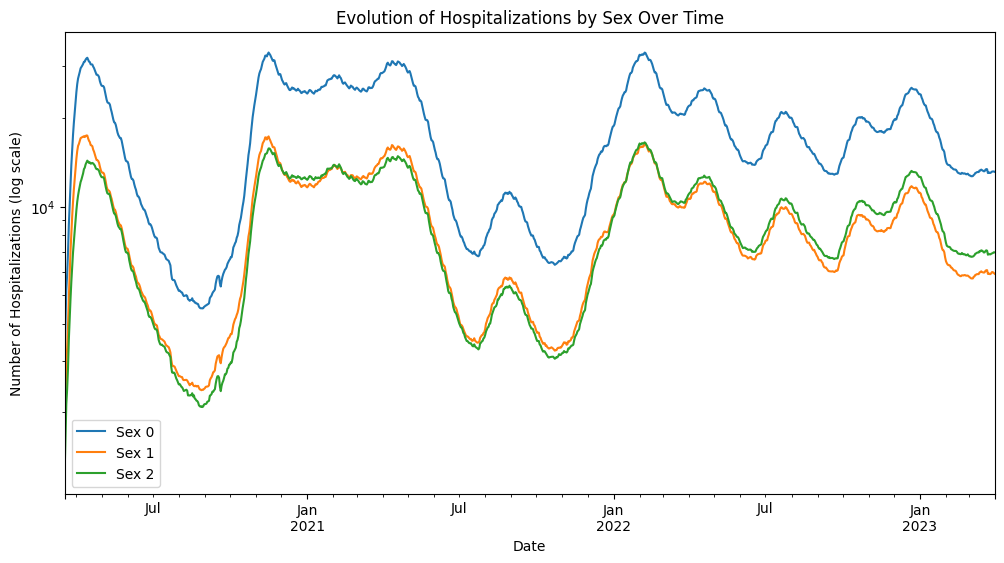

In [64]:
import matplotlib.pyplot as plt

agg_par_jour_sexe['hosp'].plot(figsize=(12, 6), title='Evolution of Hospitalizations by Sex Over Time', logy=True)
plt.xlabel('Date')
plt.ylabel('Number of Hospitalizations (log scale)')
plt.legend(['Sex 0', 'Sex 1', 'Sex 2'])
plt.show()

**Reasoning**:
The next step is to visualize the day-over-day changes in hospitalizations. This requires calculating the difference of the 'hosp' column from the `agg_par_jour` DataFrame and then plotting this differenced series.



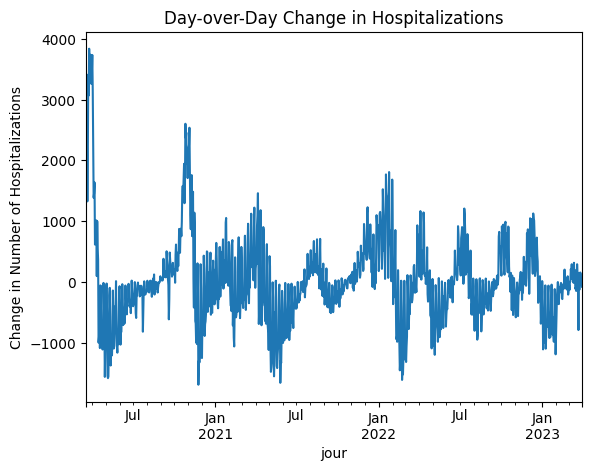

In [68]:
agg_par_jour['hosp'].diff().plot(title='Day-over-Day Change in Hospitalizations', ylabel='Change in Number of Hospitalizations')
plt.show()

**Reasoning**:
The next step is to reveal the underlying trend in hospitalizations by plotting the 7-day rolling mean of the 'hosp' column from `agg_par_jour`, as per the main task instructions.



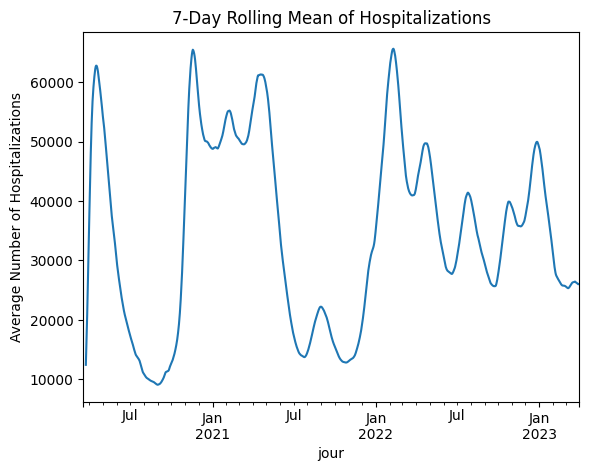

In [67]:
agg_par_jour['hosp'].rolling(7).mean().plot(title='7-Day Rolling Mean of Hospitalizations', ylabel='Average Number of Hospitalizations')
plt.show()

### Summary of Plots

1.  **Evolution of Hospitalizations by Sex Over Time (`agg_par_jour_sexe['hosp'].plot`)**:
    This plot displays the total number of hospitalizations over time, broken down by sex (represented by categories 0, 1, and 2). The `logy=True` scale helps to visualize relative changes across different magnitudes of hospitalization numbers. It allows us to observe if certain sexes were disproportionately affected at different points in the pandemic or if the trends were generally similar across sexes. It helps in understanding demographic patterns in severe COVID-19 cases.

2.  **Day-over-Day Change in Hospitalizations (`agg_par_jour['hosp'].diff().plot`)**:
    This plot shows the daily change in the total number of hospitalizations. Positive values indicate an increase in hospitalizations from the previous day, while negative values indicate a decrease. This plot is useful for identifying the acceleration or deceleration of the pandemic's impact on healthcare systems. Peaks in this plot correspond to periods of rapid increase in hospitalization demand, while troughs indicate periods of rapid decline.

3.  **7-Day Rolling Mean of Hospitalizations (`agg_par_jour['hosp'].rolling(7).mean().plot`)**:
    This plot provides a smoothed trend of hospitalizations by averaging the numbers over a 7-day window. This technique helps to filter out daily noise and weekly seasonality (e.g., lower reporting on weekends), making the underlying trend of the pandemic's progression much clearer. It's crucial for understanding the overall trajectory of hospitalizations, identifying long-term surges or declines, and informing public health policy decisions that require a stable view of the data.

## Final Task

### Subtask:
Summarize the plots generated for the evolution by sex, the differenced series, and the 7-day rolling mean series, explaining what each plot represents and how they help in understanding the COVID data.


## Summary:

### Q&A
1.  **What does the "Evolution of Hospitalizations by Sex Over Time" plot represent and how does it help in understanding the COVID data?**
    This plot displays the total number of hospitalizations over time, separated by sex (categories 0, 1, and 2), using a logarithmic y-axis to better visualize relative changes. It helps in understanding if different sexes were disproportionately affected at various points in the pandemic and reveals demographic patterns in severe COVID-19 cases.
2.  **What does the "Day-over-Day Change in Hospitalizations" plot represent and how does it help in understanding the COVID data?**
    This plot illustrates the daily increase or decrease in the total number of hospitalizations. Positive values indicate a rise, while negative values signify a fall. It is crucial for identifying the acceleration or deceleration of the pandemic's impact on healthcare systems, with peaks indicating rapid increases in demand and troughs showing rapid declines.
3.  **What does the "7-Day Rolling Mean of Hospitalizations" plot represent and how does it help in understanding the COVID data?**
    This plot presents a smoothed trend of hospitalizations by calculating the average over a 7-day window. This smoothing technique effectively filters out daily fluctuations and weekly seasonality, providing a clearer picture of the underlying trend of the pandemic's progression. It is vital for understanding the overall trajectory of hospitalizations, identifying long-term surges or declines, and informing public health policy decisions with stable data.

### Data Analysis Key Findings
*   The `agg_par_jour_sexe` DataFrame was successfully prepared by grouping data by day and sex, summing numerical columns, and unstacking the `sexe` level, creating a suitable structure for comparing hospitalization trends across sexes over time.
*   The plot showing the "Evolution of Hospitalizations by Sex Over Time" utilized a logarithmic y-axis, which is effective for visualizing relative changes in hospitalization numbers across different magnitudes for each sex.
*   The "Day-over-Day Change in Hospitalizations" plot effectively quantifies the daily fluctuations in hospitalization numbers, making it possible to pinpoint periods of rapid increase or decrease in demand.
*   The "7-Day Rolling Mean of Hospitalizations" plot successfully smoothed the data, demonstrating its utility in removing daily noise and weekly seasonality to reveal clearer underlying trends in the pandemic's progression.

### Insights or Next Steps
*   The use of the 7-day rolling mean is a robust method for mitigating noise and seasonality in time series data, providing a more reliable basis for policy decisions and trend analysis.
*   Further analysis could involve comparing the relative growth rates between sexes from the "Evolution of Hospitalizations by Sex Over Time" plot to identify any demographic shifts in susceptibility or severity over the pandemic's course.
